<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Frequentist Hypothesis Testing: t-tests and p-values


---

## Learning Objectives
### Core
- Understand the fundamental concepts of frequentist hypothesis testing
- Understand the difference between the null and alternative hypothesis
- Understand the t-statistic, p-value, and t-test
- Calculate the t-statistic and p-value by hand

### Target
- Visually represent the t-test and p-value using the t-distribution

### Stretch
- Understand how the t-test and frequentist hypothesis testing relate to the number of observations, the means and the standard deviations of each group

### Lesson Guide
- [Frequentist hypothesis testing: a drug experiment example](#frequentist-hypothesis-testing)
- [The null hypothesis](#null-hypothesis)
- [The alternative hypothesis](#alternative-hypothesis)
- [Introduction to the t-test](#t-tests)
- [The likelihood of the data given the null hypothesis](#likelihood-data)
- [Calculating the t-statistic](#t-statistic)
- [Visualizing the t-statistic](#visualizing-t-statistic)
- [The p-value](#p-value)
- [Visualizing the p-value](#visualize-p-value)
- [An alternative view: signal and noise](#signal-noise)
- [Additional resources](#additional-resources)


In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<a id='frequentist-hypothesis-testing'></a>

### Hypothesis testing using Frequentist methods: a drug efficacy experiment

---

Frequentist methods lend themselves well to the concepts of experimental design. For example, say we are testing the efficacy of a new drug:

- We randomly select 50 people to be in the placebo control condition and 50 people to receive the treatment.
- We know our sample is selected from the broader, unknown population pool.
- We can imagine that in a hypothetical parallel world we could have ended up with a different random sample of subjects from the population pool.


<a id='null-hypothesis'></a>

### The "null hypothesis"

---

The **null hypothesis** is a fundamental concept of Frequentist statistical tests. We typically denote the null hypothesis with **H0**. 

In our drug efficacy experiment example, we can define our null hypothesis to be that there is no difference between a subject taking a placebo and the treatment drug.

In the context of experiments, we often talk about the "control" group and the "experimental" or "treatment" group. In our drug example, the control group is the group given the placebo and the treatment group is given the actual drug. We are interested in the average difference in blood pressure levels between the treatment and control groups.

> **H0:** The mean difference between treatment and control groups is zero.

<a id='alternative-hypothesis'></a>

### The "alternative hypothesis"

---

The **alternative hypothesis** is the outcome of the experiment that we hope to show. In our example the alternative hypothesis is that there is in fact a mean difference in blood pressure between the treatment and control groups. 

> **H1:** The parameter of interest, our mean difference between treatment and control, is different than zero.

**NOTE:** The null hypothesis and alternative hypothesis are concerned with the true values, or in other words the *parameter of the overall population*. Through the process of experimentation / hypothesis testing and statistical analysis of the results we will make an *inference* about this population parameter.

<a id='t-tests'></a>

### Evaluating our experiment with a t-test and p-value

---

Say in our experiment we measure the following results:

- The 50 subjects in the control group have an average systolic blood pressure of 121.38
- The 50 subjects in the experimental / treatment group have an average systolic blood pressure of 111.56

The difference between experimental and control groups is -9.82 points. But with 50 subjects in each group, how confident can we be that this measured difference is real? We can perform what is known as a **t-test** to evaluate this.

First we will calculate a **t-statistic**. The t-statistic is a measure of the degree to which our groups differ standardized by the variance of our measurements.

Secondly we will calculate a **p-value**. The p-value is a metric that indicates a probability that our measured difference was due to random chance in the sampling of subjects.



**We can set up the experimental and control observations below as numpy arrays.**

In [2]:
control = np.array([166, 165, 120,  94, 104, 166,  98,  85,  97,  87, 114, 100, 152,
                    87, 152, 102,  82,  80,  84, 109,  98, 154, 135, 164, 137, 128,
                    122, 146,  86, 146,  85, 101, 109, 105, 163, 136, 142, 144, 140,
                    128, 126, 119, 121, 126, 169,  87,  97, 167,  89, 155])

experimental = np.array([83, 100, 123,  75, 130,  77,  78,  87, 116, 116, 141,  93, 107,
                         101, 142, 152, 130, 123, 122, 154, 119, 149, 106, 107, 108, 151,
                         97,  95, 104, 141,  80, 110, 136, 134, 142, 135, 111,  83,  86,
                         116,  86, 117,  87, 143, 104, 107,  86,  88, 124,  76])

print(np.mean(control))
print(np.mean(experimental))
print(np.mean(experimental) - np.mean(control))

121.38
111.56
-9.819999999999993


In [3]:
stats.ttest_ind(experimental, control)

TtestResult(statistic=-1.8915462966190273, pvalue=0.061504240672530394, df=98.0)

<a id='likelihood-data'></a>

### The likelihood of the data given the null hypothesis 

---

For our experiment we will set up a null hypothesis and an alternative hypothesis:

> **H0:** The difference in systolic blood pressure between the experimental and control groups is 0.

> **H1:** The difference in systolic blood pressure between the experimental and control groups is not 0.

Likewise, our measured difference is **-9.82**.

As Frequentists we want to know:

$$P(\text{data}\;|\;\text{mean difference})$$

**What is the probability that we observed this data GIVEN a specified mean difference in blood pressure?**

We obviously don't know the true mean difference in blood pressure resulting from the drug. The whole point of conducting the experiment is to evaluate the drug. **Instead we will assume that the true mean difference is zero: the null hypothesis H0 is assumed to be true:**

$$P(\text{data}\;|\;\text{mean difference}=0)$$

#### Set up sample mean difference as a variable:

In [4]:
# Calculate the mean difference between groups:
mean_difference = np.mean(experimental) - np.mean(control)
print(mean_difference)

-9.819999999999993


<a id='t-statistic'></a>

### Calculating the t-statistic

---

When comparing two means the **t-statistic** is a classic metric for quantifying the difference between groups. In essence our t-statistic will be a standardized version of the difference between groups, where the standardization is adjusting for the variance in measurements.

When comparing the difference between groups, we can calculate the two-sample t-statistic as

$$t = \frac{\bar{x}_E - \bar{x}_C}{\sqrt {s^2 \left(\frac{1}{n_E} + \frac{1}{n_C}\right)}}$$

where $\bar{x}_E$ is the mean of our experimental group sample measurements and $\bar{x}_C$ is the mean of our control group sample measurements.

$n_E$ and $n_C$ are the number of observations in each group. 

The $s^2$ denotes our *sample variance*. In this version of the t-test we assume that the samples in the experimental and control groups are drawn from (approximately) normal distributions with the same population variance. There is another way to calculate the t-test where equal variance is not assumed, but in our case it is a reasonable assumption.

The sample variance as an estimate of the population variance is calculated as the weighted average of the variances of each sample

$$ s^2 = \frac{\sum_{i=1}^{n_E} (x_i - \bar{x}_E)^2 + \sum_{j=1}^{n_C} (x_j - \bar{x}_C)^2}{ n_E + n_C -2} $$

which combines the variance of the two group's measurements into a single, pooled metric. 


#### With the formula above calculate the t-statistic for our example.

In [5]:
def sample_variance(sample_1, sample_2):
    n_1 = len(sample_1)
    n_2 = len(sample_2)
    dev_1 = np.sum([(x - np.mean(sample_1))**2 for x in sample_1])
    dev_2 = np.sum([(x - np.mean(sample_2))**2 for x in sample_2])
    s_squared = float(dev_1 + dev_2) / (n_1 + n_2 - 2)
    return s_squared

In [6]:
def t_statistic(experimental, control):
    s_squared = sample_variance(experimental, control)
    mean_1 = np.mean(experimental)
    mean_2 = np.mean(control)
    std = np.sqrt(s_squared * (1./len(experimental) + 1./len(control)))
    return float(mean_1 - mean_2) / std

In [7]:
t_stat = t_statistic(experimental, control)
print('Manual t-statistic:', t_stat)

Manual t-statistic: -1.8915462966190273


**Verify our calculation gives the same results as `scipy.stats.ttest_ind`**

In [8]:
import scipy.stats as stats

In [9]:
t_test_result = stats.ttest_ind(experimental, control)

In [10]:
t_test_result

TtestResult(statistic=-1.8915462966190273, pvalue=0.061504240672530394, df=98.0)

In [11]:
t_test_result.statistic

-1.8915462966190273

In [12]:
t_test_result.pvalue

0.061504240672530394

Review the formula for the t-test:
- The numerator: the difference between the group means. Recall that our assumed mean difference is 0 (our null hypothesis).
- The denominator: the square root of the pooled sample variance divided by the sample size. This is the standard error of the mean.

<a id='visualizing-t-statistic'></a>

### Visualizing the t-statistic

---

From the central limit theorem, we know that (with asymptotically infinite samples) the distribution of sample means drawn from a population is normal. As a consequence, [the ratio of the mean and standard error follows a student-t distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution).

We can plot the student-t distribution below. It is centered on zero, where a value of 0 corresponds to our null hypothesis. We can also plot a vertical line with our measured t-statistic.

In [13]:
# generate points on the x axis between -4 and 4:
xpoints = np.linspace(-4, 4, 500)

# use stats.t.pdf to get values on the probability density function for the t-distribution
# the second argument is the degrees of freedom: n1 + n2 - 2
ypoints = stats.t.pdf(xpoints, (50+50-2), 0, 1)

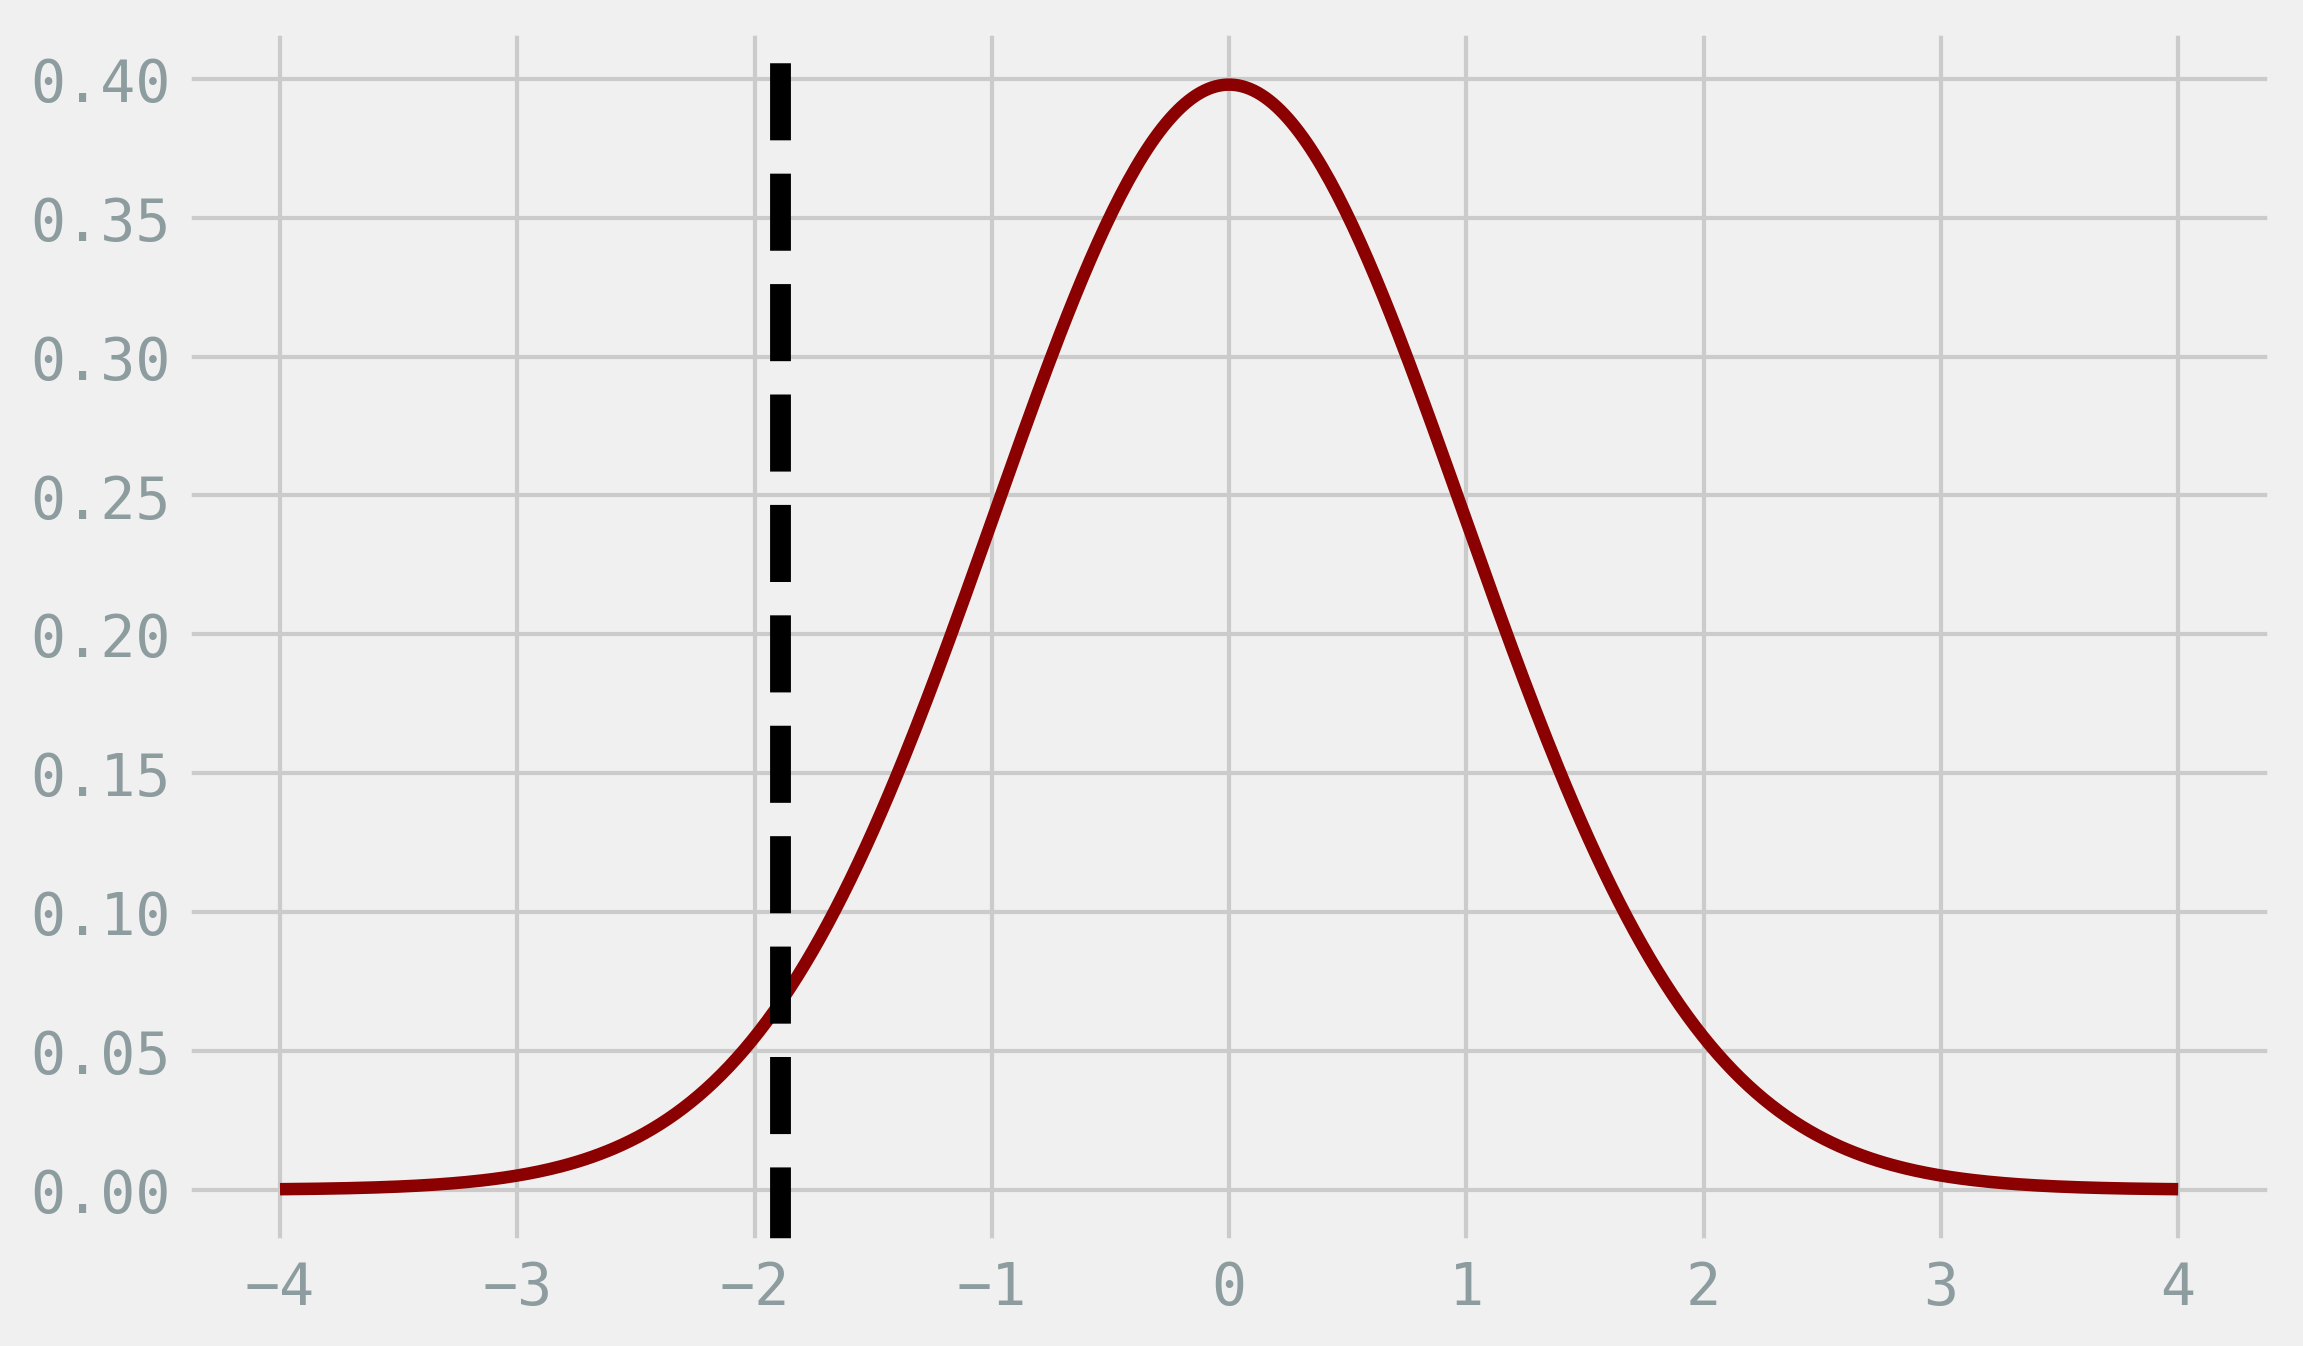

In [14]:
# initialize a matplotlib "figure"
fig = plt.figure(figsize=(8, 5))

# get the current "axis" out of the figure
ax = fig.gca()

# plot the lines using matplotlib's plot function:
ax.plot(xpoints, ypoints, linewidth=3, color='darkred')

# plot a vertical line for our measured difference in rates t-statistic
ax.axvline(t_stat, color='black', linestyle='--', lw=5)
plt.show()

<a id='p-value'></a>

### The p-value

---

With the t-statistic, we are able to calculate the *statistical significance* of the test with a **p-value**. Statistical significance indicates our degree of confidence to infer a parameter about the overall population from a statistic calculated in our sample.

Because of the unintuitive framing of Frequentist statistics, the p-value is often communicated and perceived incorrectly. It is important to remember that the p-value does **NOT** relate to the _probability of the parameter_. In frequentist statistics the parameter, such as the mean difference, is **fixed**. Probability is instead associated with the *data*.

> **The p-value is the probability that, given the null hypothesis (H0) is true, we could have ended up with a statistic at least as extreme as the one measured from our random sample of data from the true population.**

We have measured a difference in blood pressure of -9.82 between the experimental and control groups. We then calculated a t-statistic associated with this difference of -1.89. In our specific example:

> The p-value is the probability that, given there is a 0.0 true difference in blood pressure between experimental and control conditions (no effect of the drug), we were able to calculate a t-statistic at least as extreme as -1.89 from a random sample of data from the true population. If the p-value is above a given threshold, the null hypothesis is accepted, if the p-value is below that threshold, the null hypothesis is rejected.

<a id='visualize-p-value'></a>

### Visualizing the p-value

---

Our null hypothesis states there is no difference between groups. A t-statistic for no difference between groups would be 0. 

Recall that our alternative hypothesis is that the difference between groups is *not* 0. This could mean the difference is greater than or less than zero – we have not specified which one. This is known as a **2-tailed t-test** and is the one we are currently conducting. It is called "2-tailed" because when we say "at least as extreme as ..." we are thinking about the *magnitude* of our t-statistic.

**Below we can plot the t-distribution again with our t-statistic of -1.89 as well as a t-statistic of 1.89 on the other side of the distribution.**

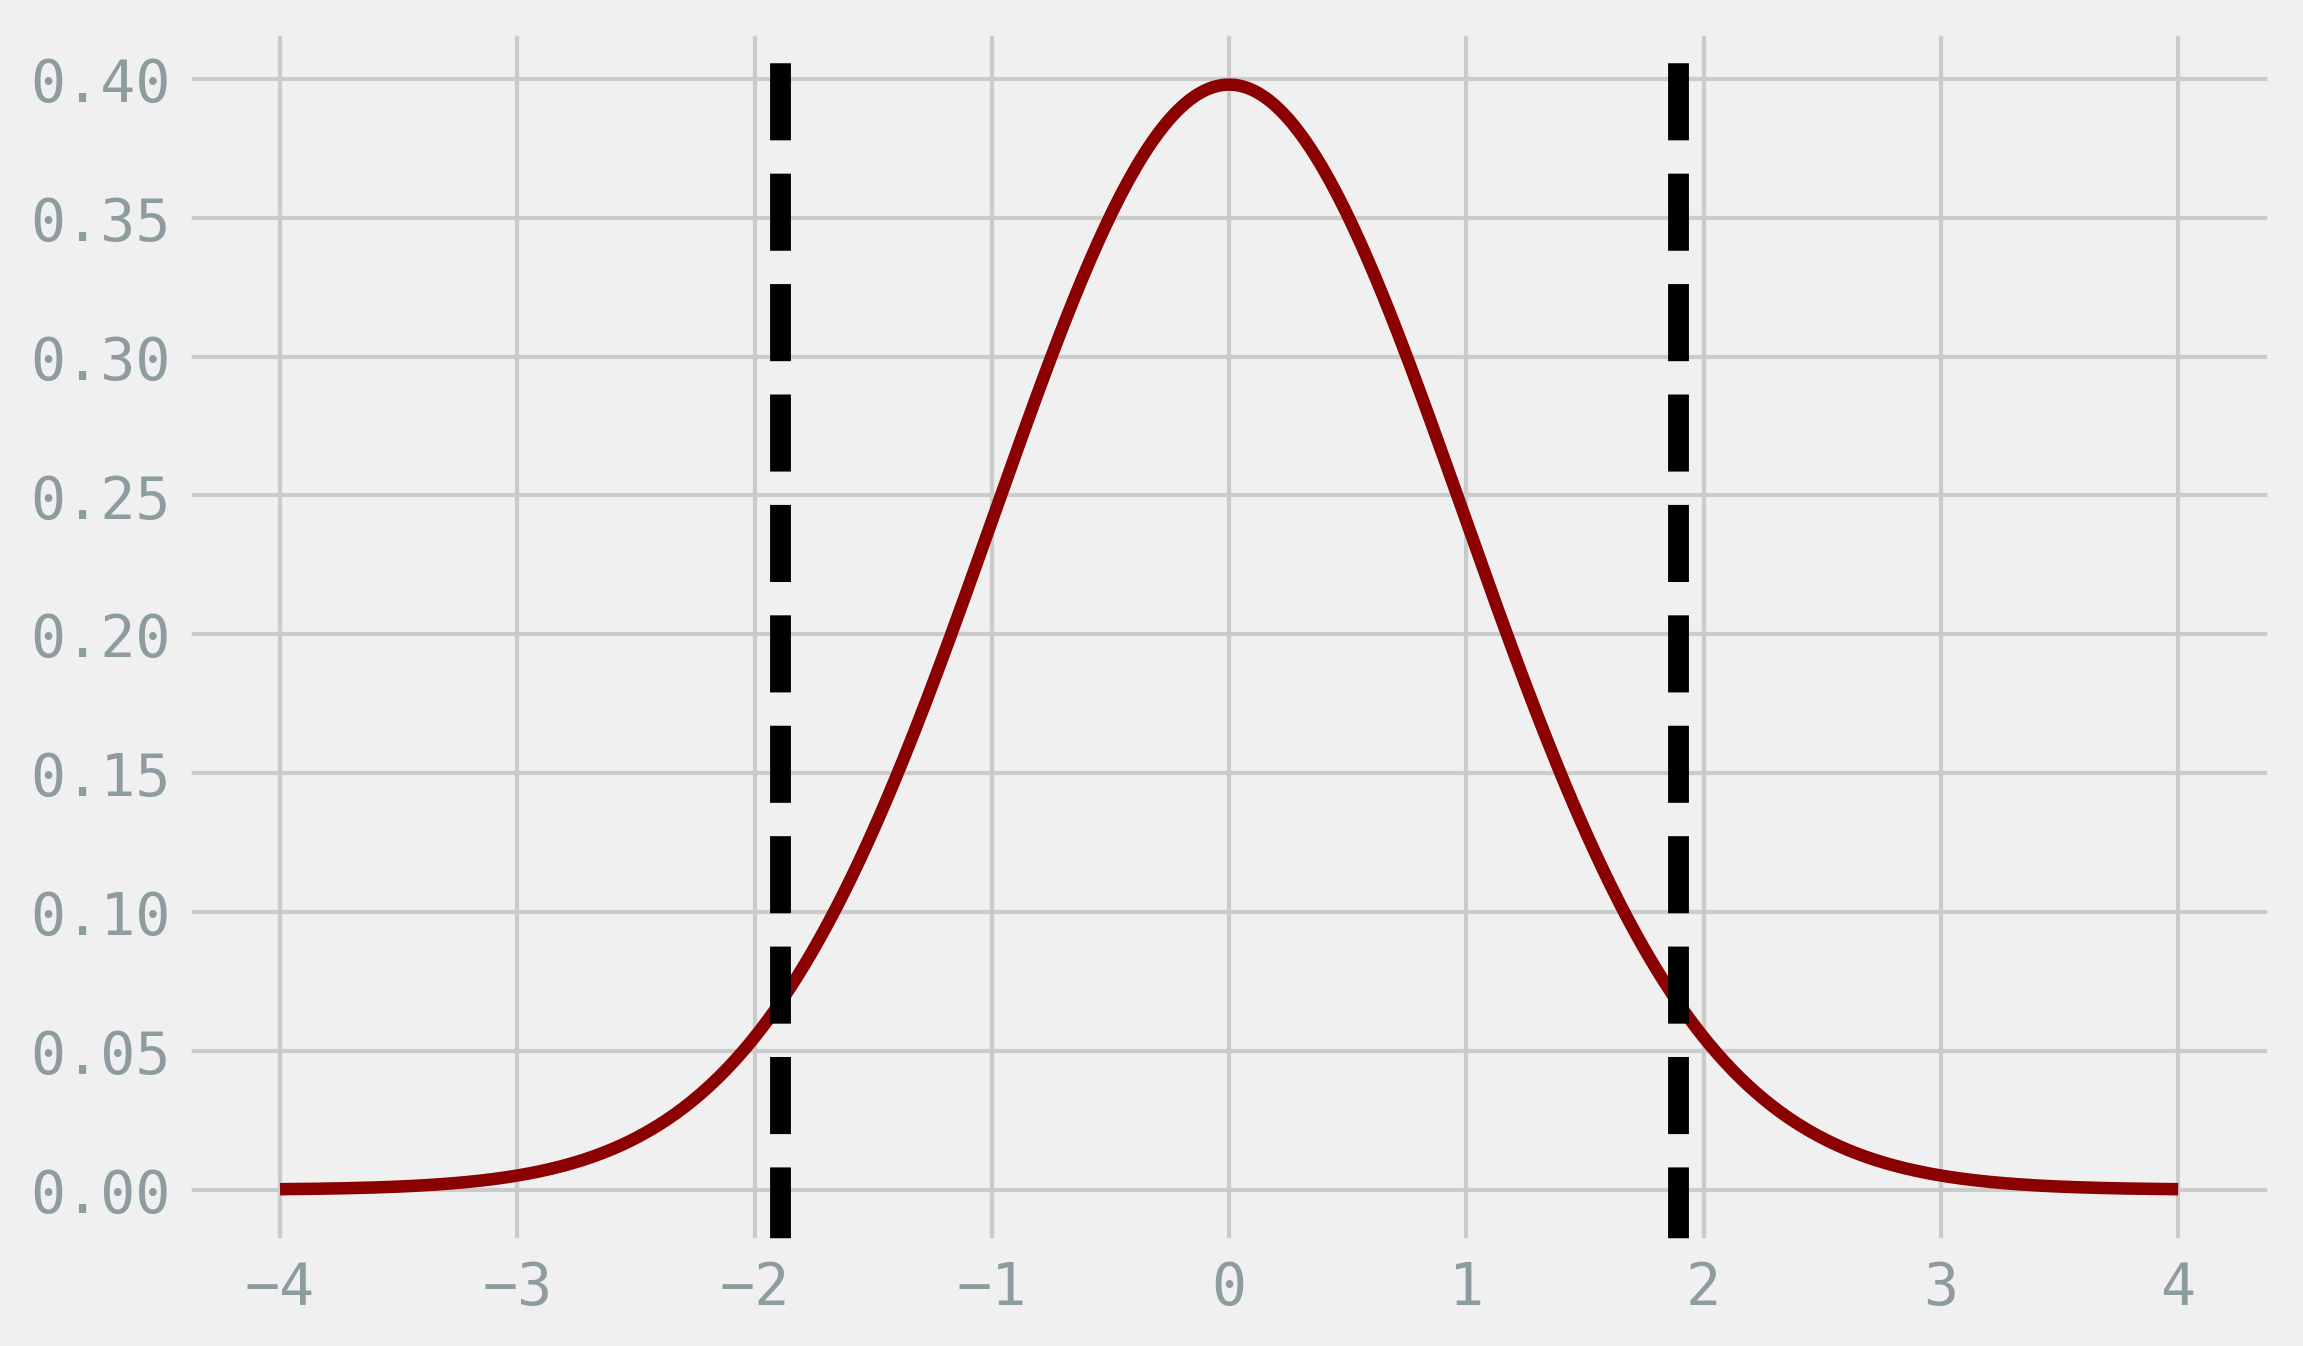

In [15]:
# initialize a matplotlib "figure"
fig = plt.figure(figsize=(8, 5))
ax = fig.gca()

ax.plot(xpoints, ypoints, linewidth=3, color='darkred')

ax.axvline(t_stat, color='black', linestyle='--', lw=5)
ax.axvline(-t_stat, color='black', linestyle='--', lw=5)
plt.show()

**Our p-value corresponds to the area under the curve of the distribution where the magnitude of the t-statistic is greater than or equal to the one we measured (shown with dotted lines.)**

The `stats.t.cdf` function is the cumulative distribution function and will calculate the area under the curve up to a specified t-statistic. 

**Calculate the area under the tails of the t-distribution beyond the dotted lines using the cdf function to verify that it is the same as the p-value calculated by scipy.**

In [16]:
lower_tail = stats.t.cdf(t_stat, (50+50-2), 0, 1)
upper_tail = 1. - stats.t.cdf(-t_stat, (50+50-2), 0, 1)
p_value = lower_tail + upper_tail
print(p_value)

0.06150424067253037


In [17]:
lower_tail

0.030752120336265197

<a id='signal-noise'></a>

### An alternative view of the t-test: signal and noise

---

Another way to think about the t-statistic is in terms of the **signal to noise ratio** in our data.

**The signal is our measured difference.** This is our measured mean difference between groups minus the hypothesized mean **H0**.

**The noise is the variation in our data**, how much our measurements vary across the groups. The t-distribution also imposes an additional penalty for smaller sample sizes by "fattening the tails" of the distribution when the number of observations is small.

Let's explore how variance, or _noise_, affects our ability to detect true differences. Below is a function that will generate blood pressure measurements for groups with a specified mean, standard deviation, and number of samples. The samples will be drawn from a normal distribution parameterized by the mean and standard deviation.

In [18]:
def generate_group(mean, std, n):
    return np.random.normal(mean, std, size=n)

**Generate two groups of 100 observations each. Group one has `mean=100` and `std=5`, group two has `mean=110` and `std=5`.**

In [19]:
np.random.seed(10)
g1 = generate_group(100, 5, 100)
g2 = generate_group(110, 5, 100)

**Plot the distributions of each group on the same plot with histograms.**

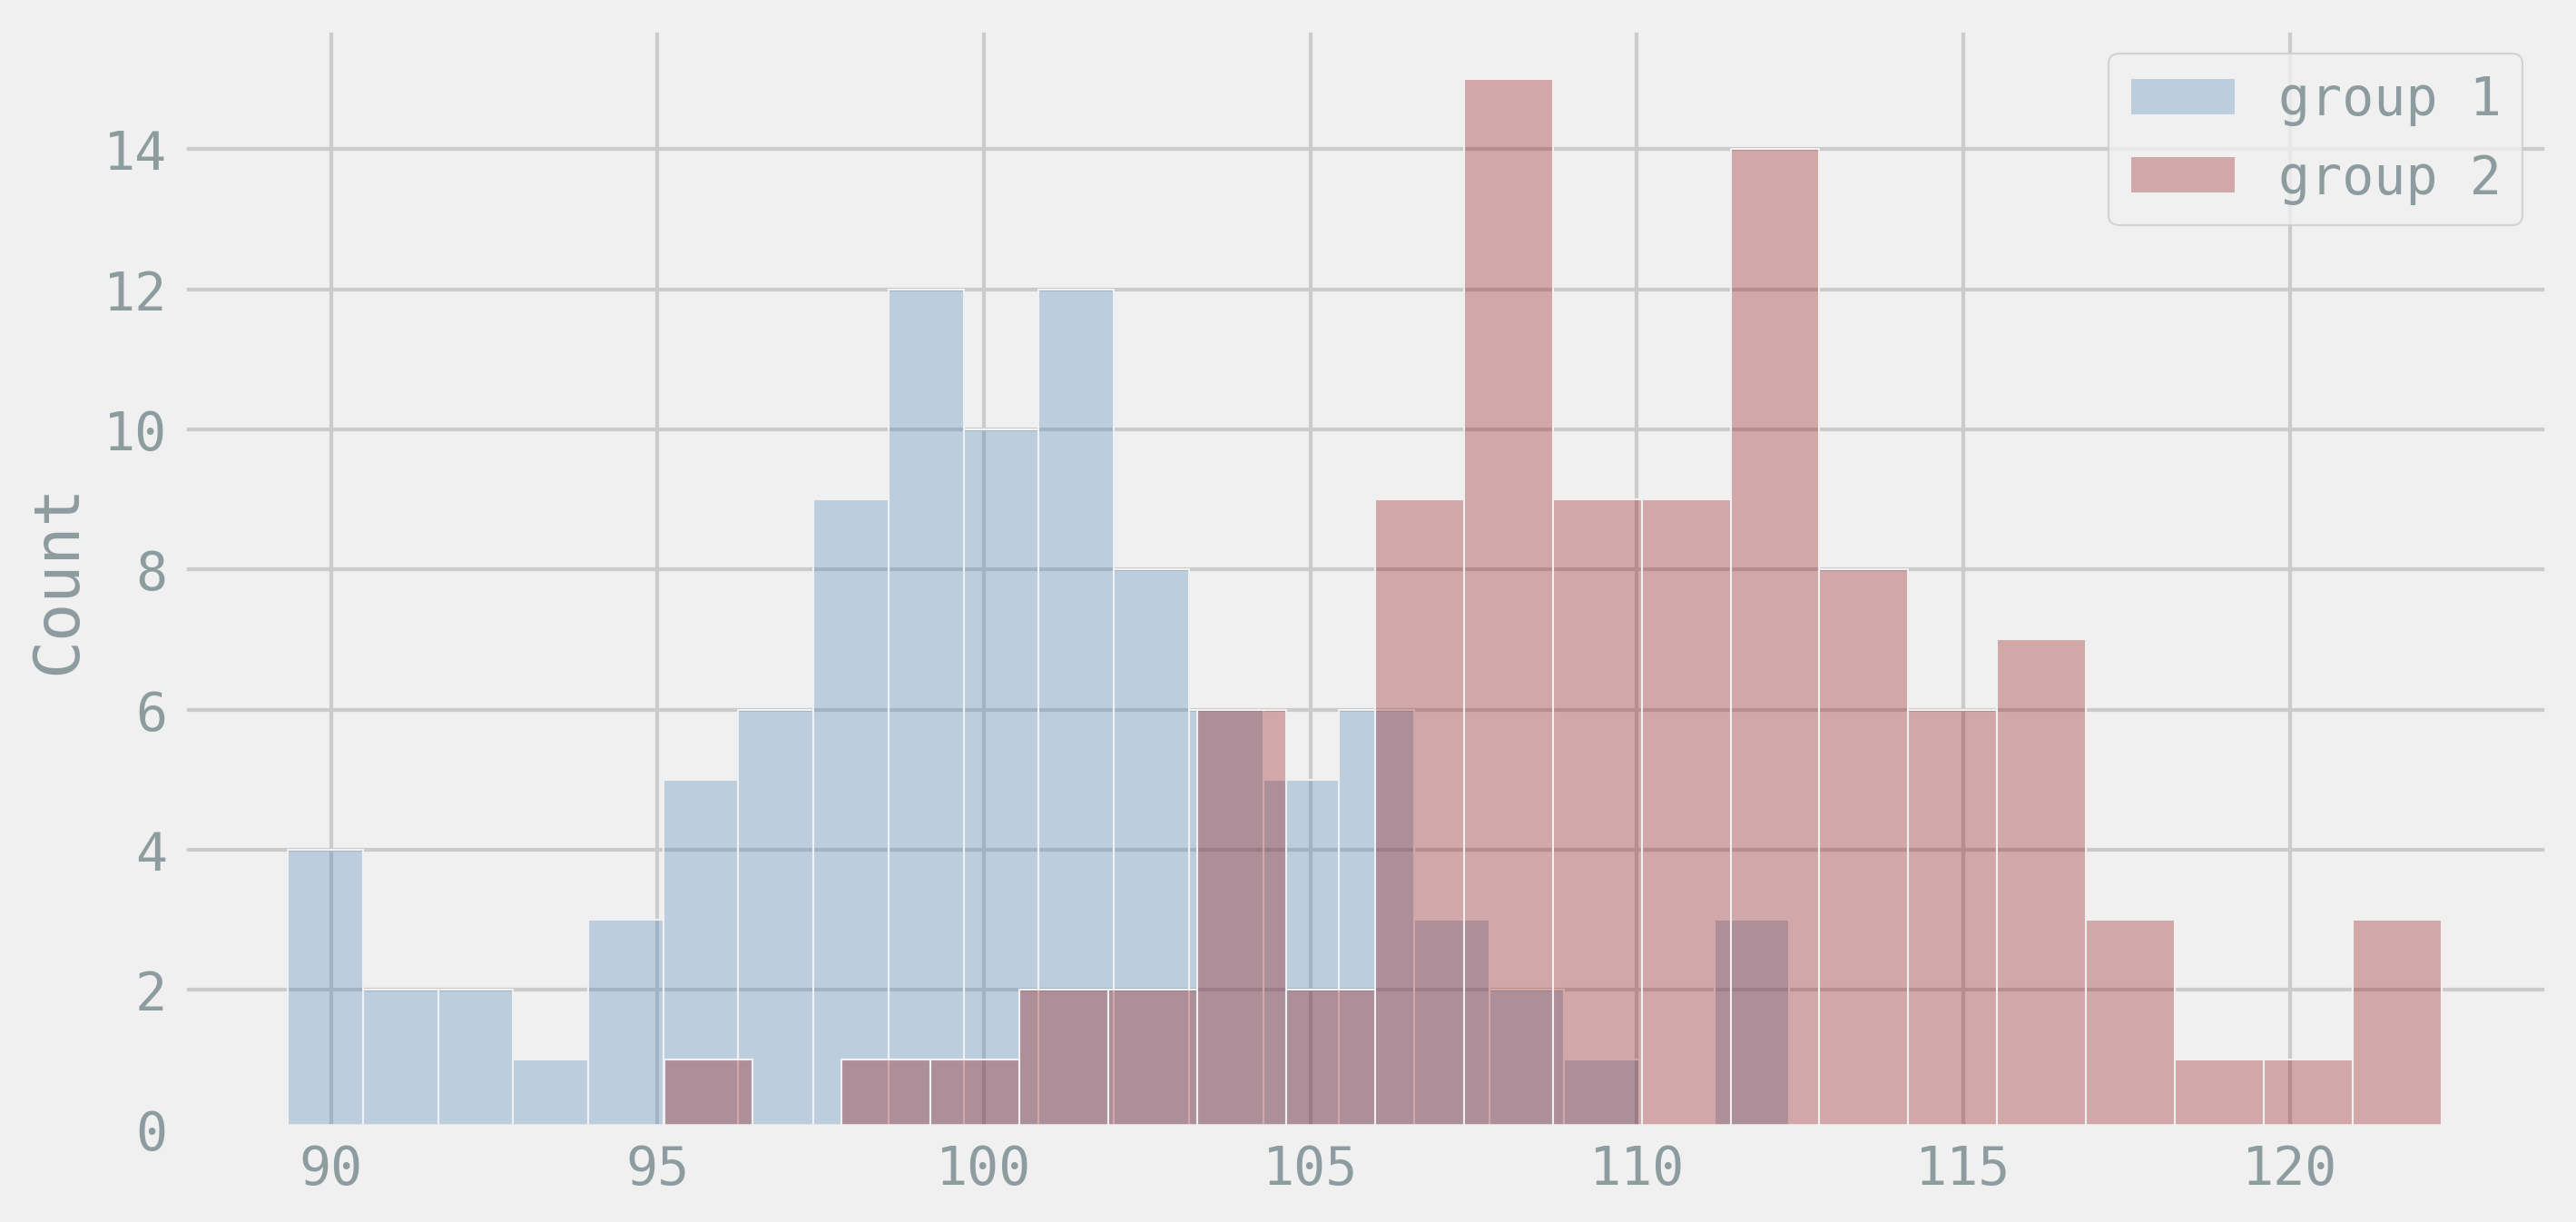

In [20]:
# Create the matplotlib figure and get the axis:
# initialize a matplotlib figure
fig = plt.figure(figsize=(10, 5))

# get the current axis out of the figure
ax = fig.gca()

# create a distribution plot with seaborn's distplot, passing in the axis and also returning it:
# first plot group 1:
sns.histplot(g1, bins=20, color='steelblue', ax=ax, kde=False, label='group 1',alpha=0.3)

# create another distribution on the same axis for group 2:
sns.histplot(g2, bins=20, color='darkred', ax=ax, kde=False, label='group 2',alpha=0.3)
ax.legend()
plt.show()

_These are randomly created groups, so expect your output to vary from your classmates_

However, you should be able to see that the two groups are quite distinct from each other.

**Use scipy to calculate the t-statistic and p-value for the difference in means between the two groups.**

In [21]:
# calculate the p-valu 
print(stats.ttest_ind(g1, g2))

TtestResult(statistic=-14.340213184081245, pvalue=1.877935834228859e-32, df=198.0)


**Generate two groups of 100 observations each again, but this time group one has `mean=100` and `std=50`, group two has `mean=110` and `std=50`.**

By increasing the standard deviation of the distribution the observations are drawn from, we are sampling more variable measurements. If measurements are more variable this implies more *noise* in the measurements. Precise measurements will have low variability.

In [22]:
np.random.seed(10)
g3 = generate_group(100, 50, 100)
g4 = generate_group(110, 50, 100)

**Plot the groups again and calculate the t-statistic and p-value.**

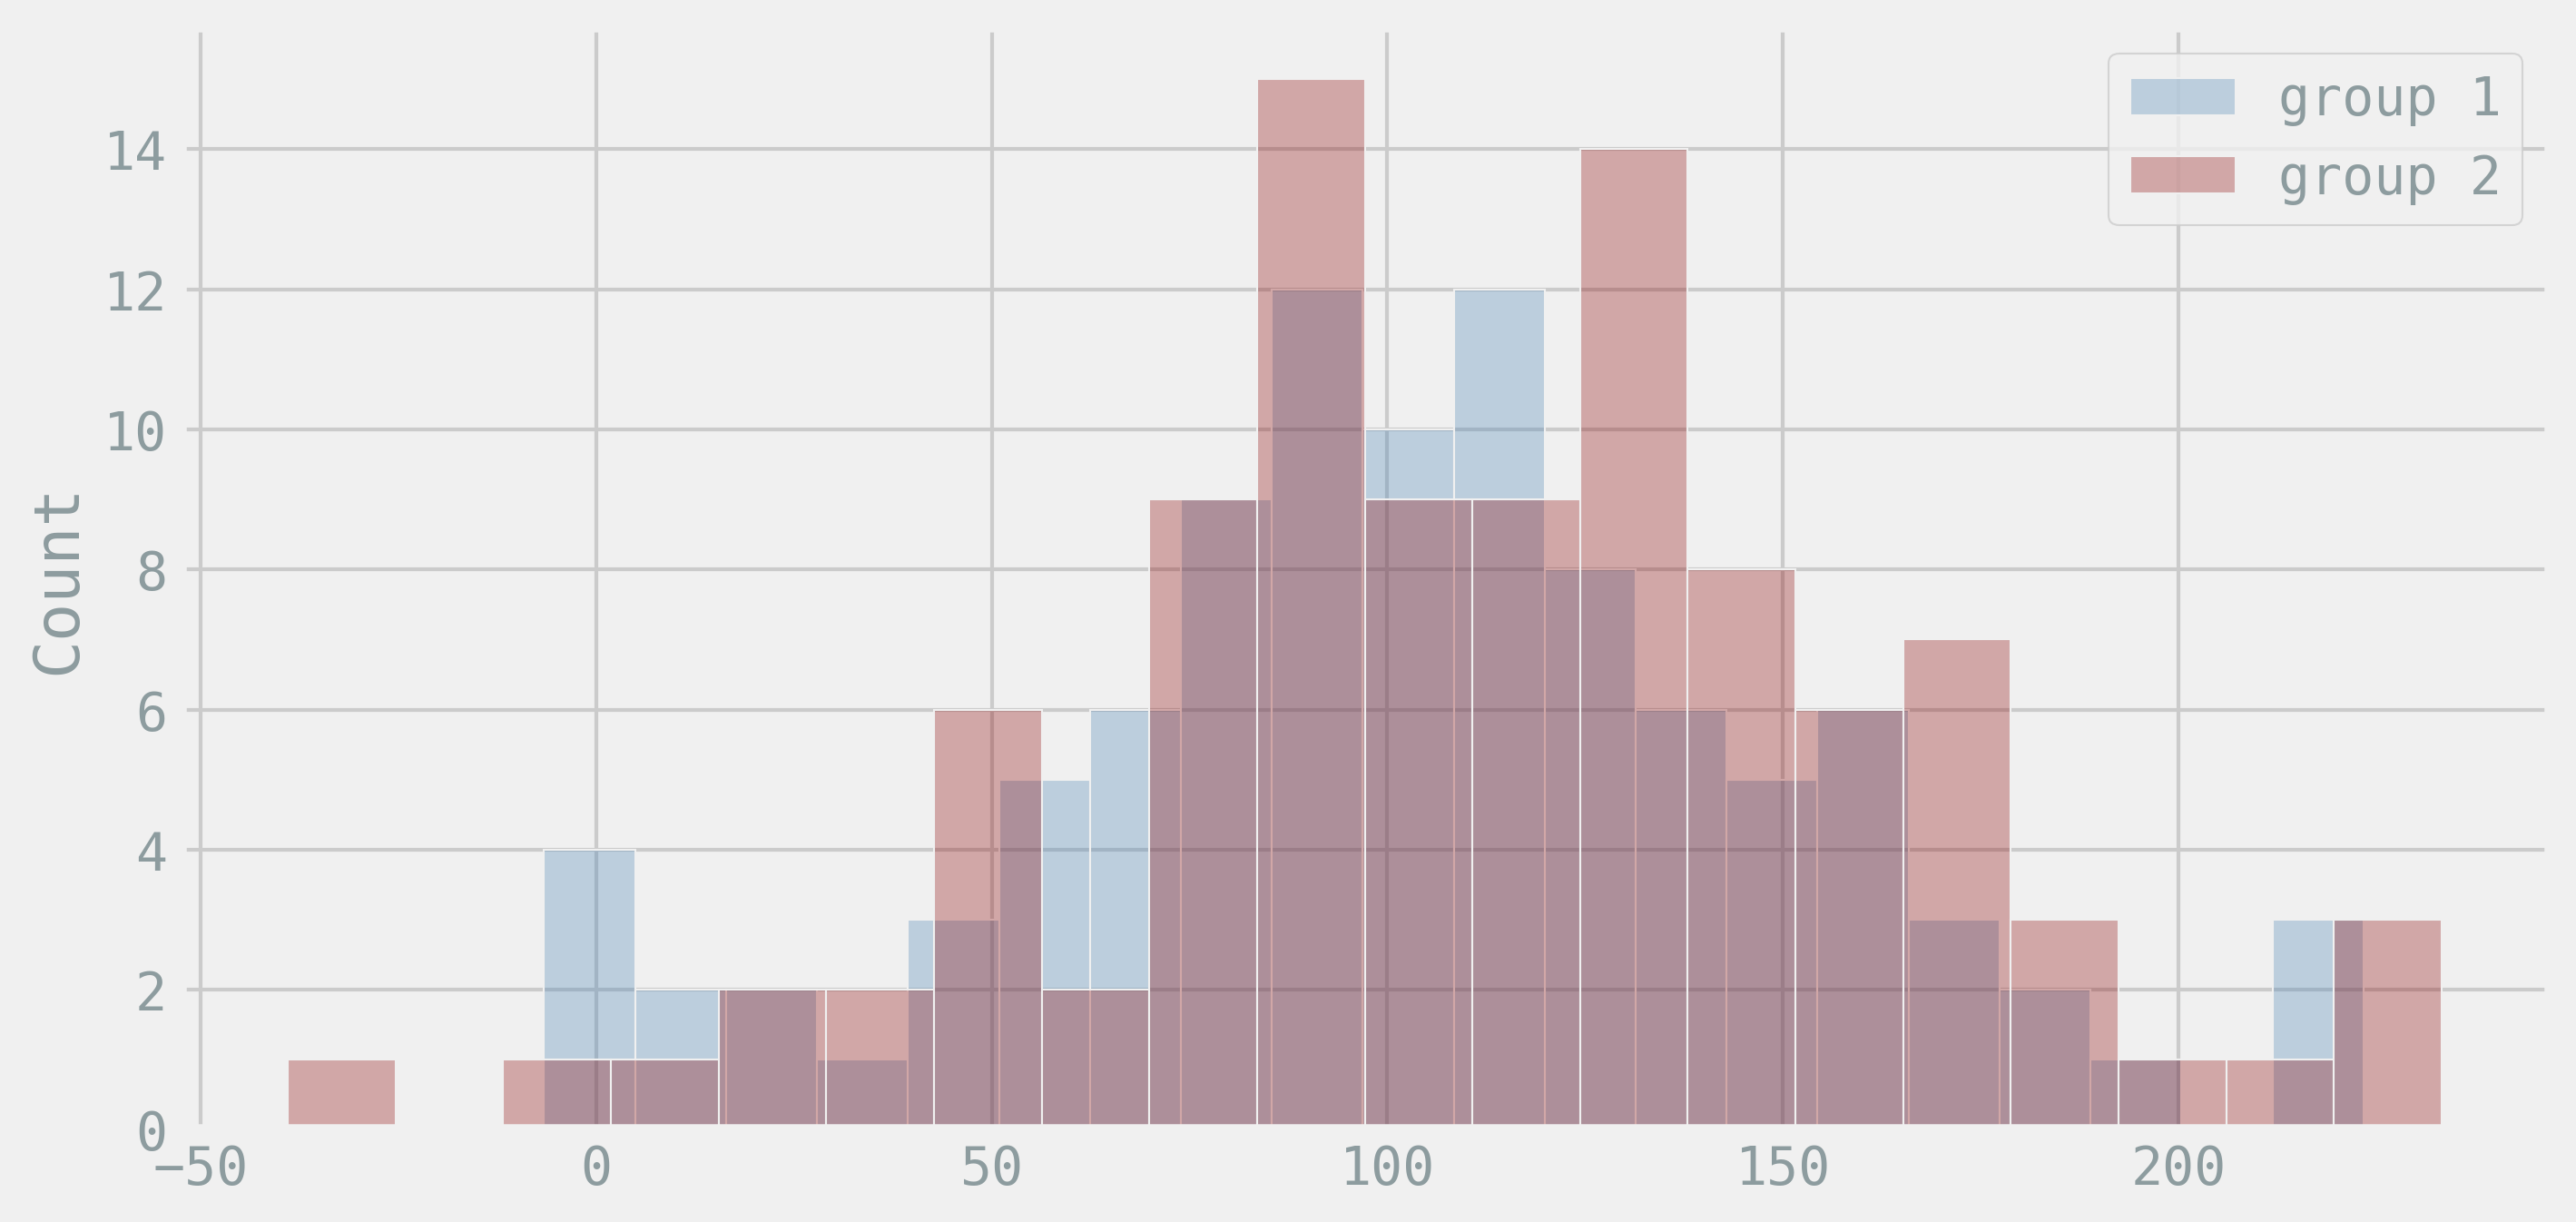

TtestResult(statistic=-1.367735334367405, pvalue=0.17294531622519752, df=198.0)


In [23]:
fig = plt.figure(figsize=(10, 5))

ax = fig.gca()

sns.histplot(g3, bins=20, color='steelblue', ax=ax, kde=False, label='group 1',alpha=0.3)
sns.histplot(g4, bins=20, color='darkred', ax=ax, kde=False, label='group 2',alpha=0.3)
ax.legend()
plt.show()

print(stats.ttest_ind(g3, g4))

By increasing the amount of noise, or variance in our observations, we have decreased the ability to infer a difference between groups despite the overall group populations having the same mean difference.

**In statistical testing of experiments there are fundamental relationships between sample size, the magnitude of the difference (signal), the variability in our measurements (noise), and our degree of confidence in inferences about the overall population.**

<a id='additional-resources'></a>

### Additional resources

---

[A gentle overview of the t-test procedure](http://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-t-values-and-p-values-in-statistics)

[Another overview of the t-test procedure](http://www.statsdirect.com/help/parametric_methods/utt.htm)
